In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout



In [52]:
!pip install pandas_profiling
!pip install wordcloud

^C
^C


In [2]:
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
#from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL


In [3]:
df = pd.read_csv(r"C:\Users\yotam\Desktop\naya\Preprocessed_data.csv")

In [117]:
df_isbn = df['isbn']#.unique()

In [118]:
df_isbn = df['isbn']
num_dict = {}
for i,j in enumerate(df_isbn.unique()):
    num_dict[j]=i
df['isbn_num'] = df['isbn'].apply(lambda txt: num_dict[txt])

In [107]:
num_dict

{0: '0195153448',
 1: '0002005018',
 2: '0060973129',
 3: '0374157065',
 4: '0393045218',
 5: '0399135782',
 6: '0425176428',
 7: '0671870432',
 8: '0679425608',
 9: '074322678X',
 10: '0771074670',
 11: '080652121X',
 12: '0887841740',
 13: '1552041778',
 14: '1558746218',
 15: '1567407781',
 16: '1575663937',
 17: '1881320189',
 18: '0440234743',
 19: '0452264464',
 20: '0609804618',
 21: '1841721522',
 22: '1879384493',
 23: '0061076031',
 24: '0439095026',
 25: '0689821166',
 26: '0971880107',
 27: '0345402871',
 28: '0345417623',
 29: '0312978383',
 30: '0425099148',
 31: '0553264990',
 32: '0553278398',
 33: '0684823802',
 34: '0891075275',
 35: '0891076182',
 36: '0375759778',
 37: '0425163091',
 38: '3404921038',
 39: '3442353866',
 40: '3442410665',
 41: '3442446937',
 42: '0375406328',
 43: '0446310786',
 44: '0449005615',
 45: '0060168013',
 46: '038078243X',
 47: '055321215X',
 48: '067176537X',
 49: '0061099686',
 50: '0553582909',
 51: '0671888587',
 52: '0553582747',
 53

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [8]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [47]:
df.duplicated().sum()

0

In [7]:
df.groupby(['Category'])['Category'].count().sort_values()
#
#ניתן לראות שיש סימני פסיקו בתוך חלק מהקטגוריות, דבר שמלכלך אותן

Category
avstrijska književnost - mladinska književnost - roman         1
Commercial products                                            1
Commodity futures                                              1
Communalism                                                    1
Never-Never Land (Imaginary place)                             1
                                                           ...  
Humor                                                       8500
Biography & Autobiography                                  22390
Juvenile Fiction                                           39617
Fiction                                                   385135
9                                                         406102
Name: Category, Length: 6172, dtype: int64

In [4]:
df['Category'] = df['Category'].str.strip(r'[]\'.,\"')

In [5]:
len(df.groupby(['Category'])['Category'].count())

6172

6172category, 2254 with 1 book only

In [45]:
len(df.groupby(['Category'])['Category'].count()[df.groupby(['Category'])['Category'].count()<2])

1799

In [14]:
'ABCD'.lower()

'abcd'

In [6]:
df['Category'] = df['Category'].str.lower()

In [7]:
df['Category'] = df['Category'].apply(lambda txt: txt if txt[0:11]!='Young Adult' else 'Young Adult')
df['Category'] = df['Category'].apply(lambda txt: txt if txt[0:11]!='Young adult' else 'Young Adult')
df['Category'] = df['Category'].apply(lambda txt: txt if txt[0:3]!='Zoo' else 'Zoo')
df['Category'] = df['Category'].apply(lambda txt: txt if txt[0:7]!='Cookery' else 'Cookery')
df['Category'] = df['Category'].apply(lambda txt: 'literary' if 'literary' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'biography & autobiography' if 'biography' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'biography & autobiography' if 'autobiography' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'history' if 'history' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'business & economics' if 'business' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'business & economics' if 'economics' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'psychology' if 'psychology' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'fiction' if ('fiction' in txt) and ('juvenile' not in txt) else txt)
df['Category'] = df['Category'].apply(lambda txt: 'health & fitness' if 'health' in txt else txt)
df['Category'] = df['Category'].apply(lambda txt: 'philosophy' if 'philosophy' in txt else txt)



In [8]:
big_cat = list(df.groupby(['Category'])['Category'].count()[df.groupby(['Category'])['Category'].count()>100].sort_values(ascending=False).index)

In [9]:
big_cat =big_cat[3:]
for cat in big_cat:
    df['Category'] = df['Category'].apply(lambda txt: cat if cat in txt else txt)
    cat_lst = cat.split()
    df['Category'] = df['Category'].apply(lambda txt: cat if cat_lst[0] in txt else txt)

In [10]:
len(df.groupby(['Category'])['Category'].count())

4130

In [114]:
df.groupby(['Category'])['Category'].count()[df.groupby(['Category'])['Category'].count()>1000].sort_values(ascending=False)#[df.groupby(['Category'])['Category'].count()>500]

Category
9                                406102
fiction                          392950
juvenile nonfiction               45400
biography & autobiography         22639
science                            9443
humor                              9247
history                            8521
religion                           7310
art                                5599
business & economics               5186
family & relationships             4616
body, mind & spirit                4581
self-help                          4328
health & fitness                   3992
literary                           3685
child psychologists                3215
cooking                            2974
psychology                         2949
crime                              2949
travel                             2867
poetry                             2731
american literature                2704
drama                              2447
computers                          2075
nature                         

# non category data

In [11]:
df9= df[df['Category']=='9']

In [12]:
df9

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
68,68,8,"timmins, ontario, canada",34.7439,0671870432,0,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,9,9,9,timmins,ontario,canada
69,69,11676,"n/a, n/a, n/a",34.7439,0671870432,8,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,9,9,9,NaN,NaN,NaN
70,70,24539,"cabrils, catalunya, spain",34.7439,0671870432,0,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,9,9,9,cabrils,catalunya,spain
80,80,8,"timmins, ontario, canada",34.7439,0887841740,5,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,9,9,9,timmins,ontario,canada
81,81,92861,"vancouver, british columbia, canada",34.7439,0887841740,0,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,9,9,9,vancouver,british columbia,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031161,1031161,278843,"pismo beach, california, usa",28.0000,0373262388,0,Mr Donaghue Investigates (Ulysses Donaghue Mys...,Anna Shone,1997.0,Worldwide Library,http://images.amazon.com/images/P/0373262388.0...,http://images.amazon.com/images/P/0373262388.0...,http://images.amazon.com/images/P/0373262388.0...,9,9,9,pismo beach,california,usa
1031163,1031163,278843,"pismo beach, california, usa",28.0000,0743525493,7,The Motley Fool's What To Do with Your Money N...,David Gardner,2002.0,Simon & Schuster Audio,http://images.amazon.com/images/P/0743525493.0...,http://images.amazon.com/images/P/0743525493.0...,http://images.amazon.com/images/P/0743525493.0...,9,9,9,pismo beach,california,usa
1031167,1031167,278851,"dallas, texas, usa",33.0000,0028630289,0,Frommer's 2000 California (Frommer's Californi...,Erika Lenkert,1999.0,Frommer's,http://images.amazon.com/images/P/0028630289.0...,http://images.amazon.com/images/P/0028630289.0...,http://images.amazon.com/images/P/0028630289.0...,9,9,9,dallas,texas,usa
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa


In [46]:
df.groupby(['book_author'])['book_author'].count()[df.groupby(['book_author'])['book_author'].count()>500].sort_values(ascending =False)

book_author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
                      ...  
Peter Mayle             505
Sebastian Junger        503
Paul Auster             502
Douglas Coupland        502
Jane Green              501
Name: book_author, Length: 262, dtype: int64

In [11]:
df_books = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first','user_id':'count','age':'mean','rating':'mean','publisher':'first','Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first', 'Summary':'first',
                                   'Language':'first','city':pd.Series.mode,'state':pd.Series.mode, 'country':pd.Series.mode})

In [12]:
df_books.groupby(['Category'])['Category'].count()[df_books.groupby(['Category'])['Category'].count()>1000].sort_values(ascending=False)

Category
9                                    131469
fiction                               54988
juvenile nonfiction                   13278
biography & autobiography              5441
science                                4260
history                                3553
religion                               3540
art                                    3390
business & economics                   2278
humor                                  1809
family & relationships                 1739
health & fitness                       1727
cooking                                1725
body, mind & spirit                    1716
american wit and humor, pictorial      1568
computers                              1439
literary                               1427
psychology                             1318
poetry                                 1227
travel                                 1117
self-help                              1114
Name: Category, dtype: int64

In [13]:
df_books9 = df_books[df_books['Category']=='9']

In [14]:
df_books9.sort_values(by = 'user_id', ascending=False).head(7)

,book_title,book_author,year_of_publication,user_id,age,rating,publisher,Category,img_s,img_m,img_l,Summary,Language,city,state,country
isbn,,,,,,,,,,,,,,,,
0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,1295,35.654957,4.468726,"Little, Brown",9,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,9,9,toronto,california,usa
0671027360,Angels & Demons,Dan Brown,2001.0,586,36.980104,3.718430,Pocket Star,9,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,9,9,"[atlanta, minneapolis]",california,usa
0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,585,35.675484,4.105983,Warner Books,9,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,9,9,toronto,california,usa
0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999.0,568,36.419979,3.593310,Back Bay Books,9,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,9,9,"[seattle, toronto]",california,usa
0375727345,House of Sand and Fog,Andre Dubus III,2000.0,552,36.665429,3.039855,Vintage Books,9,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,9,9,"[chicago, toronto]",california,usa
044021145X,The Firm,John Grisham,1992.0,529,34.981280,3.075614,Bantam Dell Publishing Group,9,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,9,9,toronto,california,usa
0440214041,The Pelican Brief,John Grisham,1993.0,523,36.513197,2.523901,Dell,9,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,9,9,toronto,california,usa


In [20]:
 #df_books[df_books['book_author']=='Dan Brown']

In [15]:
df_author = df_books.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'count'})

In [16]:

df_author['freq_Category'] = df_books.groupby('book_author')['Category'].agg(lambda x: x.mode()[0] if (x.mode()[0]!='9') or (len(x.mode())==1) else x.mode()[1])

In [17]:
df_author['num_topic'] = df_author['Category'].apply(lambda lst: 1 if type(lst)==str else len(lst))
df_author['topic9'] = df_author['Category'].apply(lambda lst: 1 if '9' in lst else 0)

In [57]:
df_author.sort_values(by = 'num_topic', ascending=False)

,Category,user_id,freq_Category,num_topic,topic9
book_author,,,,,
Rose Greydanus,"[9, animals, children's stories, fiction, game...",9,animals,9,1
Seymour Reit,"[9, airplanes, alaska, arm, bugs bunny (fictit...",9,airplanes,9,1
Sharon Peters,"[9, dentistry, easy reader, ghost stories, juv...",7,dentistry,7,1
Andrew H. Malcolm,"[9, biography & autobiography, crime and crimi...",7,biography & autobiography,7,1
Walt Disney Staff,"[9, adventure stories, children, children's st...",7,adventure stories,7,1
...,...,...,...,...,...
HARRY ALLARD,9,1,9,1,1
HARRIET ZIEFERT,9,1,9,1,1
HAROLD SCHECHTER,fiction,1,fiction,1,0


In [106]:
df_author.loc['Rose Greydanus']['Category']

array(['9', 'animals', "children's stories", 'games', 'hiding places',
       'magic tricks', 'pets', 'readers (primary)', 'science fiction'],
      dtype=object)

In [18]:
df_author9 = df_author[df_author['topic9']==1]

In [59]:
len(df_author9)

56907

In [62]:
df_author9

,Category,user_id,freq_Category,num_topic,topic9
book_author,,,,,
Mimma Balia,9,1,9,1,1
142 moms from all over the world,9,1,9,1,1
1977 Inaugural Committee (U.S.),9,1,9,1,1
73 Magazine Editors,9,1,9,1,1
";Katie Stewart""",9,1,9,1,1
...,...,...,...,...,...
Â¢ystein LÂ²nn,9,1,9,1,1
Ã?dÃ¶n von HorvÃ¡th,9,3,9,1,1
Ã?Â?dÃ?Â¶n von Horvath,9,1,9,1,1


In [19]:
df_author9_relevant = df_author9[df_author9['num_topic']>1]

In [64]:
df_author9_relevant.sort_values(by = 'num_topic', ascending=False)

,Category,user_id,freq_Category,num_topic,topic9
book_author,,,,,
Seymour Reit,"[9, airplanes, alaska, arm, bugs bunny (fictit...",9,airplanes,9,1
Rose Greydanus,"[9, animals, children's stories, fiction, game...",9,animals,9,1
Edith Kunhardt,"[9, animals, dwellings, fire extinction, juven...",7,animals,7,1
Letitia Baldrige,"[9, biography & autobiography, business & econ...",7,biography & autobiography,7,1
Autumn Stephens,"[9, art, history, humor, reference, science, w...",7,art,7,1
...,...,...,...,...,...
Guy Sajer,"[9, biography & autobiography]",2,biography & autobiography,2,1
Guy Hart-Davis,"[9, computers]",2,computers,2,1
Guy Gugliotta,"[9, science]",2,science,2,1


In [97]:
df_author9_relevant['user_id'].sum()

25942

In [65]:
len(df_author9_relevant[df_author9_relevant['num_topic']==2])

7253

In [20]:
df_author9_relevant_two_options = df_author9_relevant[df_author9_relevant['num_topic']==2]

In [21]:
df_author9_relevant_two_options['pred_Category'] = df_author9_relevant_two_options['Category'].apply(lambda lst: lst[-1])

C:\Users\yotam\AppData\Local\Temp\ipykernel_16052\448571165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_author9_relevant_two_options['pred_Category'] = df_author9_relevant_two_options['Category'].apply(lambda lst: lst[-1])


In [22]:
df_author9_relevant_two_options

,Category,user_id,freq_Category,num_topic,topic9,pred_Category
book_author,,,,,,
A E Hartink,"[9, firearms]",2,firearms,2,1,firearms
A S Byatt,"[9, fiction]",2,fiction,2,1,fiction
A'Lelia Bundles,"[9, biography & autobiography]",2,biography & autobiography,2,1,biography & autobiography
A. A. Winnie-The-Pooh Milne,"[9, juvenile nonfiction]",2,juvenile nonfiction,2,1,juvenile nonfiction
"A. B., Jr. Guthrie","[9, fiction]",2,fiction,2,1,fiction
...,...,...,...,...,...,...
Zeruya Shalev,"[9, adultery]",2,adultery,2,1,adultery
Zhang Xinxin,"[9, biography & autobiography]",2,biography & autobiography,2,1,biography & autobiography
Zoe Daniels,"[9, egypt]",2,egypt,2,1,egypt


In [24]:
df_add_cat = df_author9_relevant_two_options['freq_Category']

In [26]:
df_add_cat['A E Hartink']

'firearms'

In [30]:
add_lst = list(df_add_cat.index)

In [46]:
for i in range(len(df)):
    if df.loc[i,'book_author'] in add_lst:
        df.loc[i,'Category'] = df_add_cat[df.loc[i,'book_author']]

In [ ]:
#עבור כל אחד מהסופרים האלה, הייתי רוצה להחליף את כל הספרים שלהם לקטגוריה פריד קאט, בדאטה המקורי

In [48]:
len(df[df['Category']=='9'])

379645

# הצלחתי לשחזר כ 10000 ספרים

In [42]:
df_author[df_author['user_id']!=df_author['num_topic']]

,Category,user_id,num_topic
book_author,,,
A & E Television Network,9,2,1
A A Milne,"[bears, children's stories]",5,2
A B Guthrie,9,2,1
A E Van Vogt,9,2,1
A Martin,9,3,1
...,...,...,...
selected Karen Sullivan,9,2,1
tk,9,6,1
unknown,9,2,1


In [37]:
df_author[df_author.index=='Seymour Reit']['Category'].values

array([array(['9', 'airplanes', 'alaska', 'arm',
              'bugs bunny (fictitious character)', 'dental care',
              'juvenile fiction', 'mice', 'school buses'], dtype=object)],
      dtype=object)

<AxesSubplot:>

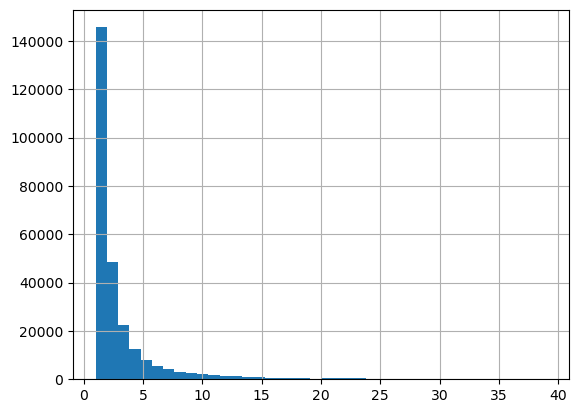

In [34]:
df_books[df_books['user_id']<40]['user_id'].hist(bins =40)

C:\Users\yotam\AppData\Local\Temp\ipykernel_16004\2551894235.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_books[df_books['user_id']>40][df_books['user_id']<300]['user_id'].hist(bins =40)


<AxesSubplot:>

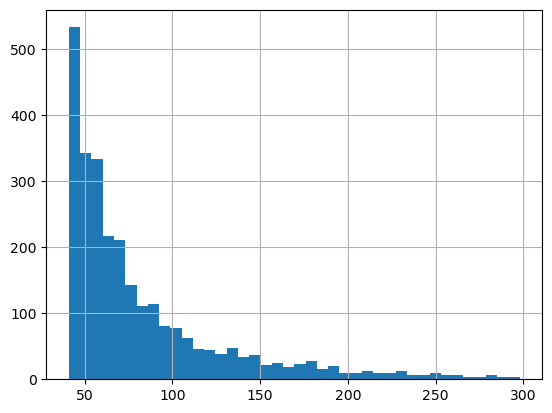

In [40]:
df_books[df_books['user_id']>40][df_books['user_id']<300]['user_id'].hist(bins =40)

<AxesSubplot:>

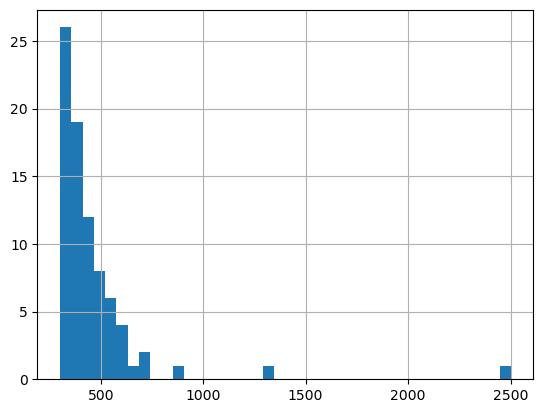

In [41]:
df_books[df_books['user_id']>300]['user_id'].hist(bins =40)

<AxesSubplot:>

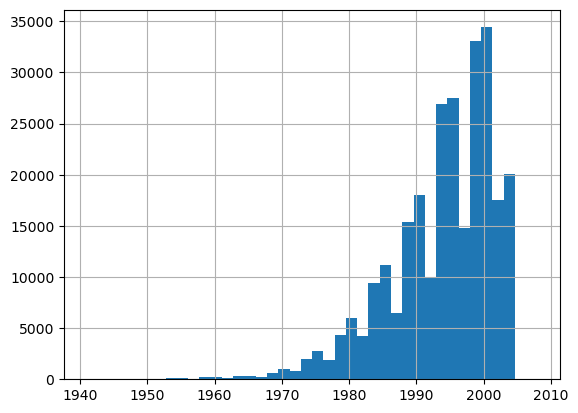

In [48]:
df_books['year_of_publication'][df_books['year_of_publication']>1940].hist(bins =40)

<AxesSubplot:>

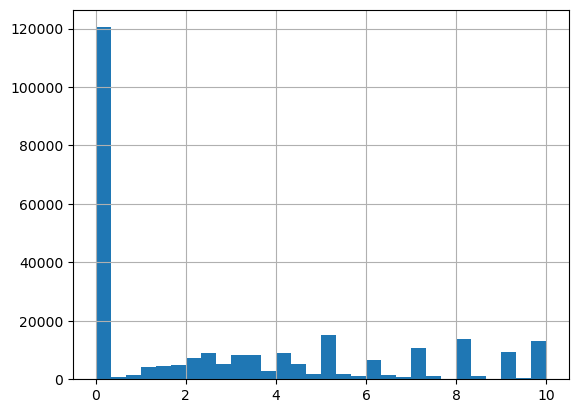

In [16]:
df_books['rating'].hist(bins=30)

In [20]:
len(df_books['rating'][df_books['rating']==0])

120328

120328 books with rating 0, out of 270170 total books

85760 of the zero books got 1 reader, 21693 got 2 reader.

In [25]:
df_books_zero = df_books[df_books['rating']==0]

<AxesSubplot:xlabel='user_id'>

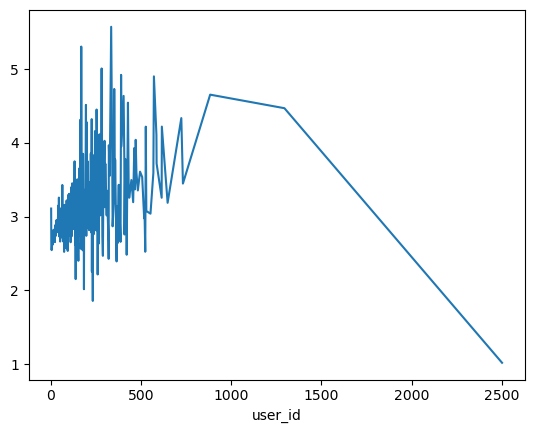

In [35]:
df_books.groupby(['user_id'])['rating'].mean().plot()

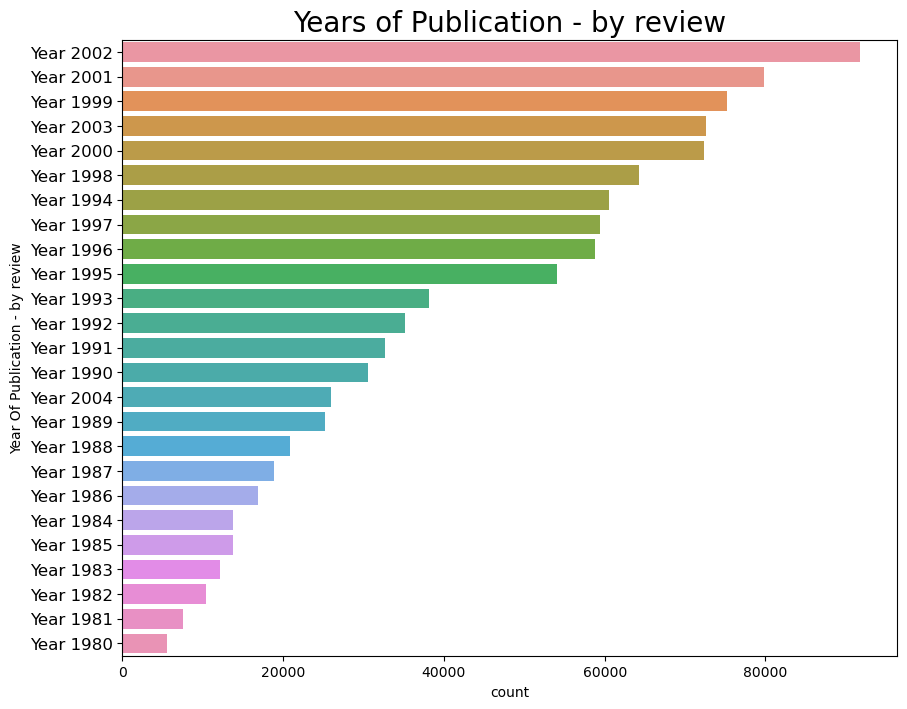

In [70]:
df_v=df[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication - by review')
plt.yticks(size=12)
plt.title('Years of Publication - by review',size=20)
plt.show()

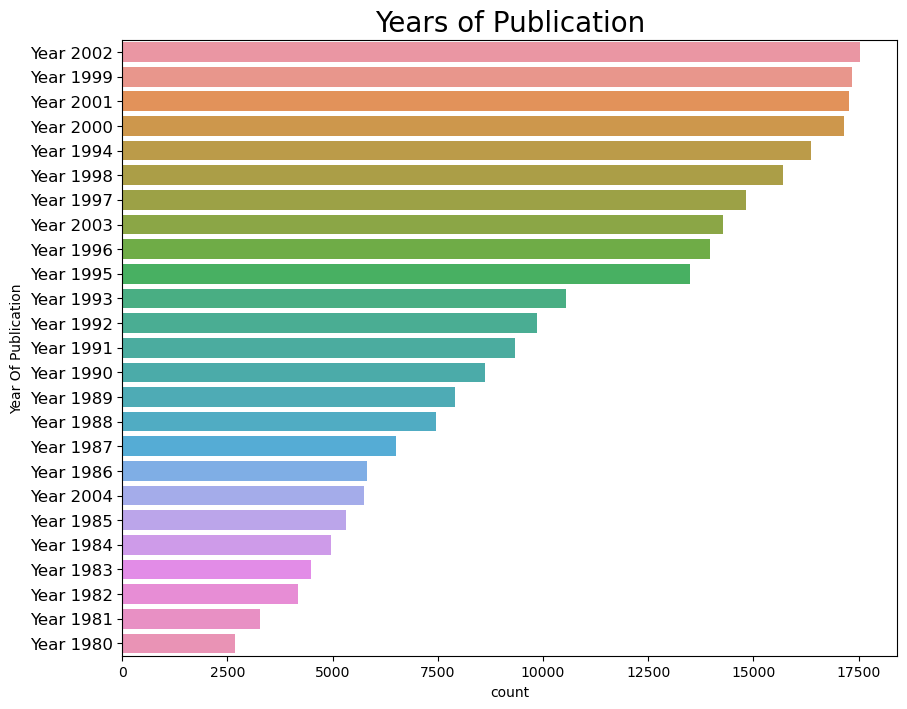

In [67]:
df_v=df_books[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

<AxesSubplot:xlabel='year_of_publication'>

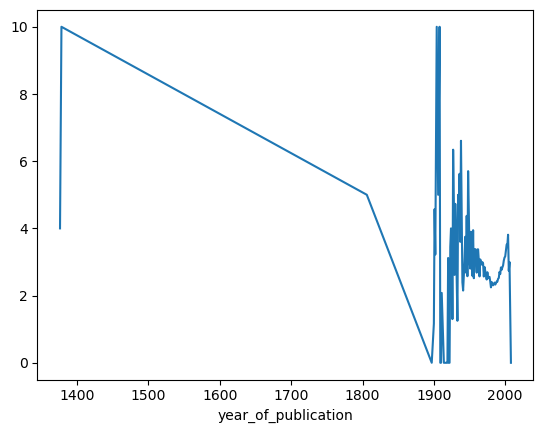

In [36]:
df_books.groupby(['year_of_publication'])['rating'].mean().plot()


In [38]:
df_books.year_of_publication.sort_values()

isbn
964442011X    1376.0
9643112136    1378.0
0781228956    1806.0
0781268001    1897.0
B0000VZEFK    1900.0
               ...  
0060567341    2005.0
0743448987    2006.0
0743456874    2006.0
1903436346    2006.0
074349346X    2008.0
Name: year_of_publication, Length: 270170, dtype: float64

In [42]:
df[df['year_of_publication']<1800]

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
888720,888720,116599,"tehran, tehran, iran",29.0,9643112136,10,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,"Mahnaz, the only daughter of a traditional ari...",fa,Fantasy fiction,tehran,tehran,iran
946880,946880,170186,"tehran, n/a, iran",27.0,964442011X,4,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,9,9,9,tehran,NaN,iran


there is 2 diffrent iranian readers that read books from years before 1800

In [65]:
df = df[df['year_of_publication']>1800]

In [33]:
df_books_zero.groupby(['user_id'])['book_title'].count()

user_id
1     85760
2     21693
3      7125
4      2986
5      1334
6       619
7       375
8       181
9        78
10       69
11       48
12       24
13       18
14        6
15        4
16        5
17        1
18        1
19        1
Name: book_title, dtype: int64

In [ ]:
#צריך לכתוב קוד שנותן לכל סופר קטגוריה מסוימת

In [58]:
#df_books.groupby(['Category','book_author'])['Category'].count().unstack()

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 324.4/324.4 kB 379.4 kB/s eta 0:00:00
     ------------------------------------ 353.0/353.0 kB 732.4 kB/s eta 0:00:00
     ------------------------------------ 153.3/153.3 kB 457.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 296.5/296.5 kB 458.1 kB/s eta 0:00:00
     ------------------------------------ 663.5/663.5 kB 804.5 kB/s eta 0:00:00
     -------------------------------------- 14.7/14.7 MB 962.6 kB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 169.0 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 3.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=32677f0126b94b4f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\yotam\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.

